In [42]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import requests
import json
import alpha_vantage
from config import apiKey
import keras

In [43]:
yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')

In [44]:
past_year = datetime.strftime(datetime.now() - timedelta(366), '%Y-%m-%d')

In [45]:
user_ticker = input("What ticker symbol would you like to evaluate?")

What ticker symbol would you like to evaluate?AAPL


In [46]:
user_ticker

'AAPL'

In [47]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo
from alpha_vantage.timeseries import TimeSeries
url = "https://www.alphavantage.co/query?"
query_url = f"{url}function=TIME_SERIES_DAILY&symbol={user_ticker}&outputsize=full&apikey={apiKey}" 

In [48]:
response = requests.get(query_url).json() 

In [49]:
df = pd.DataFrame(response["Time Series (Daily)"]) 

In [50]:
df_transposed = df.T # or df1.transpose()


In [51]:
df_filtered = df_transposed[yesterday : past_year]

In [52]:
df_filtered.rename(columns={'2. high':'high', '3. low':'low', '4. close':'close', '5. volume':'volume'}, inplace=True)

/Users/addisonpietroburgo/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [53]:
df_filtered.drop('1. open', axis=1, inplace=True)

/Users/addisonpietroburgo/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
df_filtered = df_filtered[['close', 'low', 'high', 'volume']] 

In [55]:
df_filtered.head()

,close,low,high,volume
2019-03-25,188.7400,186.6000,191.9800,43730547
2019-03-22,191.0500,190.7800,197.6900,42407666
2019-03-21,195.0900,189.8100,196.3300,51034237
2019-03-20,188.1600,184.7300,189.4900,31035231
2019-03-19,186.5300,185.9200,188.9900,31646369


In [56]:
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
ten_day_model = load_model("../ML/model_ten_day.h5")
thirty_day_model = load_model("../ML/model_thirty_day.h5")
sixty_day_model = load_model("../ML/model_sixty_day.h5")  

In [57]:

dataset = df_filtered.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
X_test, y_test = [], []
for i in range(61,len(dataset)):
    X_test.append(scaled_data[i-61:i-1,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

/Users/addisonpietroburgo/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
closing_price = sixty_day_model.predict(X_test)

In [59]:
closing_price

array([[0.12969105],
       [0.13400961],
       [0.04936101],
       [0.10890147],
       [0.16244772],
       [0.2058848 ],
       [0.25449127],
       [0.23205979],
       [0.25591663],
       [0.31966922],
       [0.29842335],
       [0.293997  ],
       [0.29259044],
       [0.300255  ],
       [0.36098385],
       [0.39784572],
       [0.4832273 ],
       [0.397822  ],
       [0.42238063],
       [0.42762354],
       [0.3437546 ],
       [0.35350642],
       [0.34187728],
       [0.40514076],
       [0.39934713],
       [0.51730305],
       [0.5942362 ],
       [0.54673624],
       [0.5120438 ],
       [0.5919365 ],
       [0.61671656],
       [0.73647696],
       [0.77498794],
       [0.7687437 ],
       [0.6905085 ],
       [0.67122704],
       [0.76516366],
       [0.9245767 ],
       [0.87834877],
       [0.8015948 ],
       [0.8032991 ],
       [0.8570489 ],
       [0.8919282 ],
       [0.8508449 ],
       [0.91338485],
       [0.89657426],
       [0.8780846 ],
       [0.841

In [60]:
final = []
for price in closing_price:
    final.append(np.pad(price, (0, 3), 'constant'))
final_price = scaler.inverse_transform(final)
close = []
for price in final_price:
    close.append(price[0])

In [61]:
close

[153.84663152515887,
 154.2347841590643,
 146.62656716763973,
 151.97806420445443,
 156.79080114245414,
 160.69492576658726,
 165.06367531061173,
 163.04753407657145,
 165.19178627848626,
 170.921869212389,
 169.01229068517685,
 168.6144494366646,
 168.4880286860466,
 169.17691945314408,
 174.63522830963134,
 177.94837288975717,
 185.6224708533287,
 177.94624069809913,
 180.15357068300247,
 180.62480378985404,
 173.08666250944137,
 173.9631566774845,
 172.91793007612227,
 178.6040512895584,
 178.08331972837448,
 188.68519809484482,
 195.59994921445846,
 191.33065328598022,
 188.21249441862105,
 195.39325519800187,
 197.62048474550247,
 208.3845489668846,
 211.84591568946837,
 211.28468320131302,
 204.2529026174545,
 202.5198861670494,
 210.96290976524352,
 225.290953772068,
 221.13598724603654,
 214.23734006643295,
 214.3905257153511,
 219.2215577149391,
 222.35650625228882,
 218.66394138097763,
 224.28503074884415,
 222.7740943813324,
 221.11224384546279,
 217.81350227355955,
 223.597

In [62]:
len(df_filtered)

251

In [63]:
valid = df_filtered[61:] 

In [64]:
valid

,close,low,high,volume
2018-12-24,146.8300,146.5900,151.5500,37169232
2018-12-21,150.7300,149.6300,158.1600,95744384
2018-12-20,156.8300,155.3000,162.1100,64772960
2018-12-19,160.8900,159.0900,167.4500,49047297
2018-12-18,166.0700,164.3900,167.5300,33841518
2018-12-17,163.9400,162.7300,168.3500,44287922
2018-12-14,165.4800,165.2800,169.0800,40703710
2018-12-13,170.9500,169.5500,172.5700,31897827
2018-12-12,169.1000,169.0200,171.9200,35627674
2018-12-11,168.6300,167.0000,171.7900,47281665


In [65]:
valid["Predictions"] = close 

/Users/addisonpietroburgo/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
valid

,close,low,high,volume,Predictions
2018-12-24,146.8300,146.5900,151.5500,37169232,153.846632
2018-12-21,150.7300,149.6300,158.1600,95744384,154.234784
2018-12-20,156.8300,155.3000,162.1100,64772960,146.626567
2018-12-19,160.8900,159.0900,167.4500,49047297,151.978064
2018-12-18,166.0700,164.3900,167.5300,33841518,156.790801
2018-12-17,163.9400,162.7300,168.3500,44287922,160.694926
2018-12-14,165.4800,165.2800,169.0800,40703710,165.063675
2018-12-13,170.9500,169.5500,172.5700,31897827,163.047534
2018-12-12,169.1000,169.0200,171.9200,35627674,165.191786
2018-12-11,168.6300,167.0000,171.7900,47281665,170.921869


TypeError: unhashable type: 'numpy.ndarray'

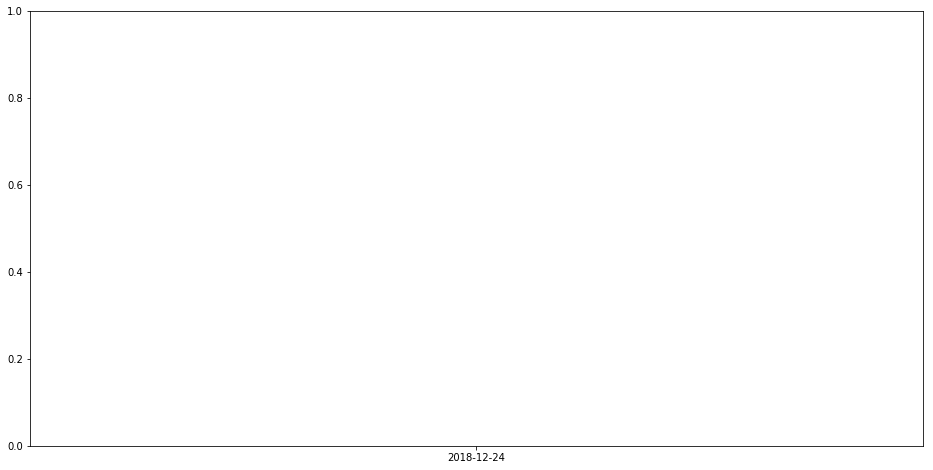

In [67]:

plt.figure(figsize=(16,8))


#plt.plot(train['close'])
plt.plot(valid[['close']])